In [62]:
%matplotlib notebook

In [73]:
#!jupyter nbconvert --to script net.ipynb

In [64]:
import scipy
import sys
import os
import numpy as np
import caffe

import matplotlib
import matplotlib.pyplot as plt

In [72]:
USED_MODEL = 'vgg16'
SUBTRACT_MEAN = False
SWITCH_R_AND_B = False
TEST_IMAGE = 'data/images/dog.jpg'
MEANS = np.array([103.939, 116.779, 123.68], dtype=np.int)

MODELS = {
    'vgg16': {
        'weights':'model/VGG_ILSVRC_16_layers.caffemodel',
        'model':'model/VGG_ILSVRC_16_layers_deploy.prototxt'
    },
    'vgg19': {
        'weights':'model/VGG_ILSVRC_19_layers.caffemodel',
        'model':'model/VGG_ILSVRC_19_layers_deploy.prototxt'
    }
}

assert(USED_MODEL in MODELS)

weights = MODELS[USED_MODEL]['weights']
model = MODELS[USED_MODEL]['model']

assert os.path.exists(weights), 'Weights file missing! {}'.format(weights)
assert os.path.exists(model), 'Model file missing! {}'.format(model)

In [66]:
def get_img(path):
    return np.moveaxis(np.array(scipy.misc.imread(path), dtype=np.int), 2, 0)

def show_img(img):
    if img.shape[0] == 3:
        img = np.moveaxis(np.array(img, dtype=np.float32), 0, 2)
    plt.imshow(img * 255)
    plt.show()

def top_k(elements, labels, k = 5): 
    top = elements.argsort()[-k:][::-1]
    probs = elements[top]
    return list(zip(probs, np.array(labels)[top]))

def print_top_k(elements, labels, k = 5):
    print("\n".join(['{:.4f} {}'.format(prob, name[10:]) for prob, name in top_k(elements, labels, k = k)]))

In [67]:
labels = open('data/labels.txt').read().split('\n')

In [68]:
net = caffe.Classifier(model, weights)

<IPython.core.display.Javascript object>


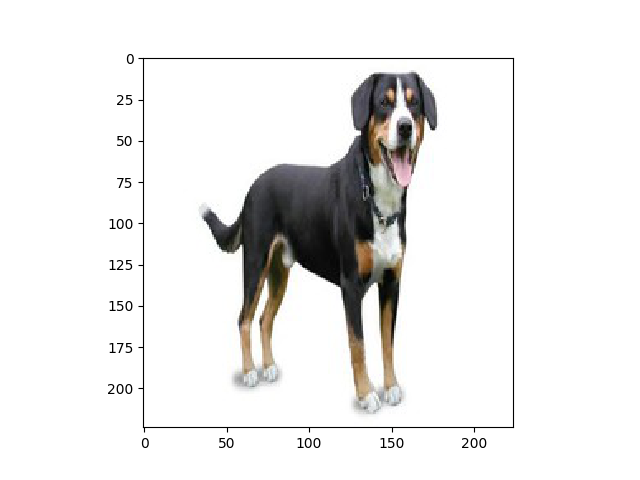

In [69]:
img = get_img(TEST_IMAGE)

# DEPRECATED!
if False:
    for y in img:
        for x in y:
            if SWITCH_R_AND_B:
                r = x[0]
                g = x[1]
                b = x[2]
                x[0] = b
                x[2] = r
            if SUBTRACT_MEAN:
                x -= MEANS

show_img(img)

In [70]:
net.forward(data = np.array([img]))
#_ = net.forward()

{'prob': array([[  2.19705942e-09,   1.90108818e-09,   8.13242380e-08,
           4.02037834e-08,   2.03049510e-07,   1.14694041e-08,
           1.62148233e-08,   2.51396983e-08,   2.21549934e-09,
           6.65738131e-09,   5.12636378e-09,   6.54464927e-09,
           2.14505569e-09,   1.85094002e-08,   1.25503841e-09,
           2.40630138e-09,   4.40233405e-09,   5.43763967e-09,
           2.54780854e-08,   4.37031611e-09,   1.17130028e-09,
           6.43054108e-08,   4.62292817e-08,   1.64626641e-08,
           7.68757324e-09,   6.13552409e-09,   1.87534521e-09,
           4.83481521e-09,   2.74689942e-08,   3.67150266e-09,
           4.47526105e-09,   9.82086519e-08,   6.19995522e-09,
           3.50383988e-09,   9.69852820e-08,   1.82736970e-09,
           6.24467411e-09,   7.15660509e-09,   1.56327076e-07,
           1.37621035e-08,   5.88887588e-08,   1.37989016e-08,
           3.41109918e-09,   8.26526225e-09,   4.00657418e-09,
           3.16895332e-09,   2.38731257e-08,   

In [71]:
fc8 = net.blobs['fc8'].data[0]
prob = net.blobs['prob'].data[0]
with open('data/fc8.txt', 'w') as f:
    f.write(','.join([str(x) for x in fc8]))
    f.write('\n')

prob = net.blobs['prob'].data[0]
with open('data/prob.txt', 'w') as f:
    f.write('\n'.join(['{:.10f} {:<4} {}'.format(x, idx, labels[idx]) for idx, x in enumerate(prob)]))

print_top_k(prob, labels, k = 10)


0.7858 Great Dane
0.1302 Weimaraner
0.0218 Walker hound, Walker foxhound
0.0137 black-and-tan coonhound
0.0080 dalmatian, coach dog, carriage dog
0.0073 American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
0.0063 boxer
0.0042 muzzle
0.0037 whippet
0.0036 English foxhound
